In [1]:
import pandas as pd
import numpy as np

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from sklearn.preprocessing import RobustScaler , MinMaxScaler

In [61]:
train = pd.read_csv("Google_Stock_price_Train.csv")

In [4]:
train.head()

,﻿Date,Open,High,Low,Close,Volume
0,26-Sep-17,936.69,944.08,935.12,937.43,1672749
1,25-Sep-17,939.45,939.75,924.51,934.28,1873375
2,22-Sep-17,942.77,950.00,940.84,943.26,1074806
3,21-Sep-17,948.13,952.80,939.38,947.55,1370685
4,20-Sep-17,937.73,950.00,937.50,947.54,2004018


In [62]:
train = train.iloc[:,1]

In [63]:
train_label = train[1:]
train = train[:-1]

In [64]:
scaler = MinMaxScaler()
train = train.reshape(-1,1)
scale_train = scaler.fit_transform(train)

In [65]:
scale_train_label = scaler.transform(np.reshape(train_label,(-1,1)))

In [66]:
scale_train = np.reshape(scale_train, (-1, 1, 1))

In [67]:
def model_making():
    model = Sequential()
    model.add(LSTM(128,input_shape=(1,1),return_sequences=True))
    model.add(Dropout(0.1))
    model.add(LSTM(units = 50))
    model.add(Dropout(0.1))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
model = model_making()

In [68]:
model.fit(scale_train,scale_train_label,batch_size = 32,epochs=100)

Epoch 1/100
1257/1257 [==============================] - 2s 2ms/step - loss: 0.1444
Epoch 2/100
1257/1257 [==============================] - 0s 171us/step - loss: 0.0202
Epoch 3/100
1257/1257 [==============================] - 0s 157us/step - loss: 0.0087
Epoch 4/100
1257/1257 [==============================] - 0s 157us/step - loss: 0.0025
Epoch 5/100
1257/1257 [==============================] - 0s 159us/step - loss: 0.0014
Epoch 6/100
1257/1257 [==============================] - 0s 160us/step - loss: 0.0014
Epoch 7/100
1257/1257 [==============================] - 0s 163us/step - loss: 0.0013
Epoch 8/100
1257/1257 [==============================] - 0s 173us/step - loss: 0.0014
Epoch 9/100
1257/1257 [==============================] - 0s 172us/step - loss: 0.0013
Epoch 10/100
1257/1257 [==============================] - 0s 163us/step - loss: 0.0014
Epoch 11/100
1257/1257 [==============================] - 0s 154us/step - loss: 0.0012
Epoch 12/100
1257/1257 [==============================

1257/1257 [==============================] - 0s 169us/step - loss: 6.3877e-04
Epoch 93/100
1257/1257 [==============================] - 0s 157us/step - loss: 6.1403e-04
Epoch 94/100
1257/1257 [==============================] - 0s 188us/step - loss: 6.5685e-04
Epoch 95/100
1257/1257 [==============================] - 0s 152us/step - loss: 5.9039e-04
Epoch 96/100
1257/1257 [==============================] - 0s 189us/step - loss: 5.7161e-04
Epoch 97/100
1257/1257 [==============================] - 0s 162us/step - loss: 6.0106e-04
Epoch 98/100
1257/1257 [==============================] - 0s 157us/step - loss: 5.7586e-04
Epoch 99/100
1257/1257 [==============================] - 0s 172us/step - loss: 6.6797e-04
Epoch 100/100
1257/1257 [==============================] - 0s 176us/step - loss: 6.3321e-04


In [116]:
test = pd.read_csv("Google_Stock_Price_Test.csv")

In [105]:
test.head()

,﻿Date,Open,High,Low,Close,Volume
0,25-Oct-17,986.27,994.43,977.72,991.46,1395282
1,24-Oct-17,986.50,989.26,977.08,988.49,1445129
2,23-Oct-17,1005.18,1005.79,983.10,985.54,1639294
3,20-Oct-17,1007.05,1008.65,1002.27,1005.07,1606031
4,19-Oct-17,1004.75,1007.32,997.30,1001.84,1714243


In [117]:
test= test.iloc[:,1]

In [72]:
#test_data = test[:-1]
#test_label = test[1:]

In [112]:
test = scaler.transform(test.reshape(-1,1))
#test_label = scaler.transform(test_label.reshape(-1,1))

In [113]:

test = test.reshape(-1,1,1)

In [114]:
res = model.predict(test)
res = scaler.inverse_transform(res)

In [51]:
import matplotlib.pyplot as plt

In [74]:
test_data = np.reshape(test_data,(-1,1,1))

In [75]:
res = model.predict(test_data)

In [77]:
test_label = scaler.inverse_transform(test_label)

In [91]:
res = scaler.inverse_transform(res)

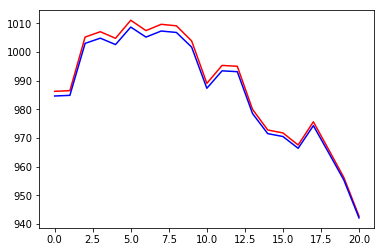

In [118]:

plt.plot(test,color='red')
plt.plot(res,color='blue')

In [102]:
res.shape

(21, 1)

In [103]:
test.shape

(21,)